In [3]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224))
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images

In [5]:
from google.colab import files
uploaded = files.upload()

!unzip MRI_Tumor.zip

Saving MRI_Tumor.zip to MRI_Tumor.zip
Archive:  MRI_Tumor.zip
   creating: MRI_Tumor/
   creating: MRI_Tumor/no/
  inflating: MRI_Tumor/no/1 no.jpeg  
  inflating: MRI_Tumor/no/10 no.jpg  
  inflating: MRI_Tumor/no/11 no.jpg  
  inflating: MRI_Tumor/no/12 no.jpg  
  inflating: MRI_Tumor/no/13 no.jpg  
  inflating: MRI_Tumor/no/14 no.jpg  
  inflating: MRI_Tumor/no/15 no.jpg  
  inflating: MRI_Tumor/no/17 no.jpg  
  inflating: MRI_Tumor/no/18 no.jpg  
  inflating: MRI_Tumor/no/19 no.jpg  
  inflating: MRI_Tumor/no/2 no.jpeg  
  inflating: MRI_Tumor/no/20 no.jpg  
  inflating: MRI_Tumor/no/21 no.jpg  
  inflating: MRI_Tumor/no/22 no.jpg  
  inflating: MRI_Tumor/no/23 no.jpg  
  inflating: MRI_Tumor/no/24 no.jpg  
  inflating: MRI_Tumor/no/25 no.jpg  
  inflating: MRI_Tumor/no/26 no.jpg  
  inflating: MRI_Tumor/no/27 no.jpg  
  inflating: MRI_Tumor/no/28 no.jpg  
  inflating: MRI_Tumor/no/29 no.jpg  
  inflating: MRI_Tumor/no/3 no.jpg   
  inflating: MRI_Tumor/no/30 no.jpg  
  inflating: 

In [6]:
yes_tumor_images = load_images('/content/MRI_Tumor/yes')
no_tumor_images = load_images('/content/MRI_Tumor/no')

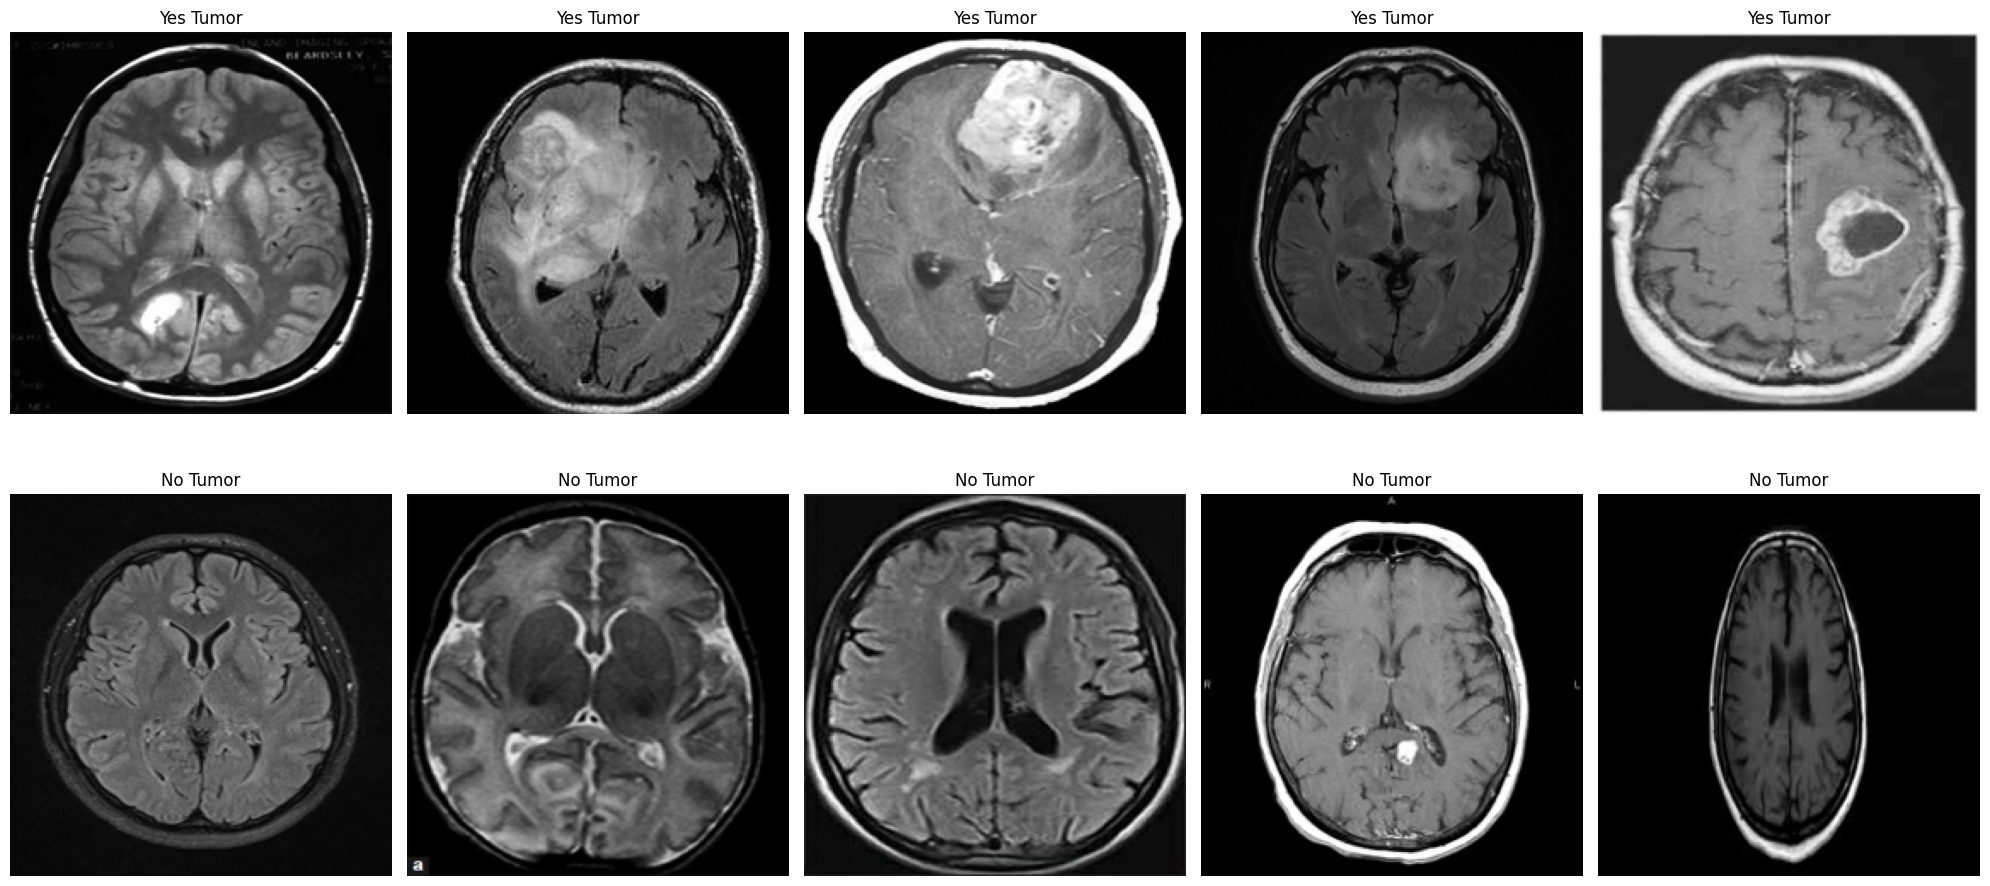

In [7]:
import matplotlib.pyplot as plt

yes_subset = yes_tumor_images[1:6]
no_subset = no_tumor_images[1:6]
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, image in enumerate(yes_subset):
    row = i // 5
    col = i % 5
    axes[0, col].imshow(image)
    axes[0, col].set_title('Yes Tumor')
    axes[0, col].axis('off')

for i, image in enumerate(no_subset):
    row = i // 5
    col = i % 5
    axes[1, col].imshow(image)
    axes[1, col].set_title('No Tumor')
    axes[1, col].axis('off')

plt.tight_layout()  # Agar subplot terlihat lebih rapi
plt.show()


In [8]:
print("Type Yes Image : ", type(yes_tumor_images))
print("Total Image Yes : ", len(yes_tumor_images))

print("Type No Image : ", type(no_tumor_images))
print("Total Image No : ", len(no_tumor_images))

Type Yes Image :  <class 'list'>
Total Image Yes :  150
Type No Image :  <class 'list'>
Total Image No :  93


In [9]:
def assign_labels(yes_tumor_images, no_tumor_images):
    yes_tumor_labels = np.ones(len(yes_tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return yes_tumor_labels, no_tumor_labels
yes_tumor_labels, no_tumor_labels = assign_labels(yes_tumor_images, no_tumor_images)

In [10]:
yes_tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
data_tumor = yes_tumor_images + no_tumor_images
labels = np.concatenate((yes_tumor_labels, no_tumor_labels), axis=0)

In [13]:
print("Len Data Tumor : ", len(data_tumor))
print("Type Data Tumor : ", type(data_tumor))
print("Len Labels : ", len(labels))
print("Type Labels : ", type(labels))

Len Data Tumor :  243
Type Data Tumor :  <class 'list'>
Len Labels :  243
Type Labels :  <class 'numpy.ndarray'>


In [14]:
X = np.array(data_tumor)
y = np.array(labels)

In [15]:
X

array([[[[0.12156863, 0.12156863, 0.12156863],
         [0.12941176, 0.12941176, 0.12941176],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.09411765, 0.09411765, 0.09411765],
         [0.07058824, 0.07058824, 0.07058824],
         [0.0745098 , 0.0745098 , 0.0745098 ]],

        [[0.11764706, 0.11764706, 0.11764706],
         [0.14117647, 0.14117647, 0.14117647],
         [0.16078431, 0.16078431, 0.16078431],
         ...,
         [0.62352941, 0.62352941, 0.62352941],
         [0.72156863, 0.72156863, 0.72156863],
         [0.71764706, 0.71764706, 0.71764706]],

        [[0.11372549, 0.11372549, 0.11372549],
         [0.15294118, 0.15294118, 0.15294118],
         [0.18039216, 0.18039216, 0.18039216],
         ...,
         [0.85490196, 0.85490196, 0.85490196],
         [0.96470588, 0.96470588, 0.96470588],
         [0.98431373, 0.98431373, 0.98431373]],

        ...,

        [[0.10196078, 0.10196078, 0.10196078],
         [0.13333333, 0.13333333, 0.13333333]

In [16]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train.shape

(194, 224, 224, 3)

In [19]:
y_train.shape

(194,)

In [20]:
X_train

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.02352941, 0.02352941, 0.02352941]

In [21]:
y_train

array([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1.])

In [22]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [23]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [24]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

In [25]:
train.as_numpy_iterator().next()

(array([[[[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ]],
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ]],
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          ...,
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ]],
 
         ...,
 
         [[0.0627451 , 0.0627451 , 0.0627451 ],
          [0.06274

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [28]:
from keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.98 and logs.get('val_accuracy') >= 0.98:
            print("\nStop Training!")
            self.model.stop_training = True

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(train, validation_data=val, epochs=20, verbose=1, callbacks=[CustomCallback()])

Epoch 1/20
6/6 [==============================] - 24s 3s/step - loss: 14.1598 - accuracy: 0.5920 - val_loss: 0.8772 - val_accuracy: 0.8000
Epoch 2/20
6/6 [==============================] - 19s 3s/step - loss: 8.0648 - accuracy: 0.6494 - val_loss: 0.4093 - val_accuracy: 0.9000
Epoch 3/20
6/6 [==============================] - 20s 3s/step - loss: 2.8161 - accuracy: 0.7126 - val_loss: 1.9219 - val_accuracy: 0.7000
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: 1.6744 - accuracy: 0.7644 - val_loss: 0.0748 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 20s 3s/step - loss: 0.7522 - accuracy: 0.8621 - val_loss: 0.1760 - val_accuracy: 0.9000
Epoch 6/20
6/6 [==============================] - 20s 3s/step - loss: 0.2256 - accuracy: 0.9195 - val_loss: 0.1469 - val_accuracy: 0.9000
Epoch 7/20
6/6 [==============================] - 18s 3s/step - loss: 0.1383 - accuracy: 0.9540 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 8/20
6/6 [=================

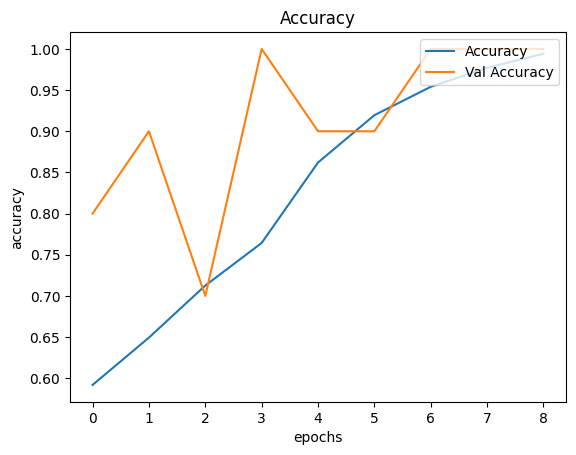

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

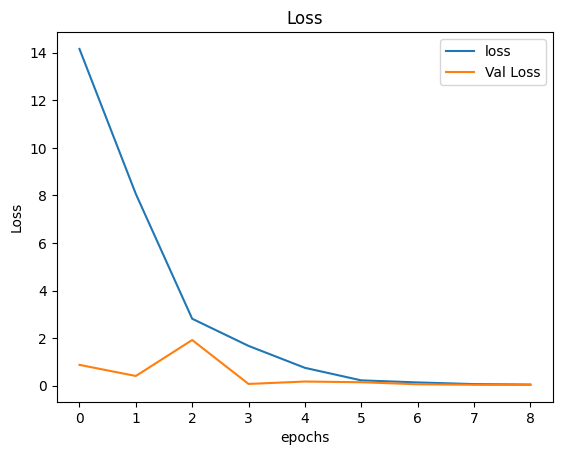

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

Saving Y259.JPG to Y259.JPG
1/1 [==============================] - 0s 126ms/step
Y259.JPG
Tumor


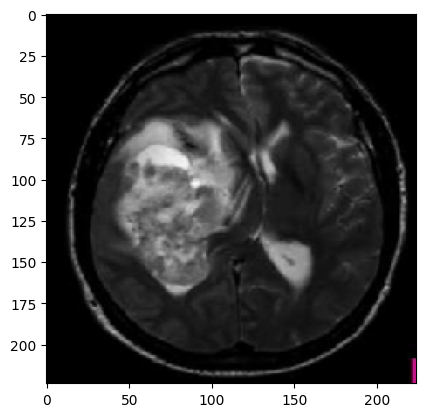

In [34]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(fn)
    if classes[0, 0] == 1:
        print('Tumor')
    else:
        print('Not Tumor')


Saving No18.jpg to No18.jpg
1/1 [==============================] - 0s 130ms/step
No18.jpg
Not Tumor


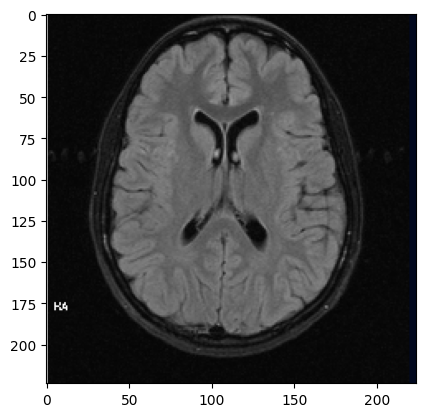

In [36]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(fn)
    if classes[0, 0] == 1:
        print('Tumor')
    else:
        print('Not Tumor')